<a href="https://colab.research.google.com/github/AndreRodas/Business_Analytics_Models_TG/blob/main/2023_07_11_ProgBin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programacion Binaria pura

Una compañía tiene que escoger un conjunto de proyectos de la siguiente lista para un horizonte de planeación de 3 años. Su objetivo es maximizar el Valor Presente Neto Total, pero sin gastar más de lo presupuestado en cualquiera de los 3 años.

Unidad monetaria: $ 1000.

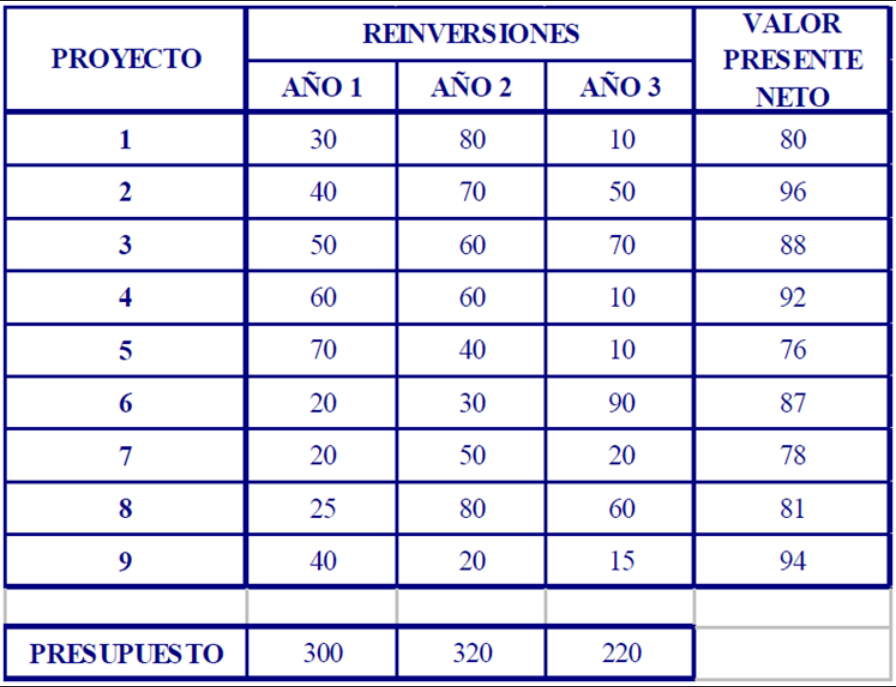

Además se dan las siguientes condiciones:
a) La compañía debe escoger al menos uno de los proyectos 1 o 9, (o ambos).
b) Si el proyecto 6 es seleccionado, entonces el proyecto 8 también debe ser seleccionado, pero si el proyecto 8 se selecciona, el proyecto 6 no necesariamente debe ser seleccionado.
c) Los proyectos 1 y 3 no deben ser seleccionados a la vez.


In [3]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 105.2 MB/s eta 0:00:00


In [4]:
from pulp import *
import numpy as np

In [5]:
presupuesto = np.array([300,320,220])
vpn = np.array([80,96,88,92,76,87,78,81,94])
reinv = np.array([[30,80,10],[40,70,50],[50,60,70],[60,60,10],[70,40,10],[20,30,90],[20,50,20],[25,80,60],[40,20,15]])
periodos = 3
numproy = len(vpn)

In [6]:
inversion = LpProblem("Inversion", LpMaximize)

In [7]:
X = LpVariable.matrix("X",range(numproy),cat="Binary")

In [8]:
inversion +=  lpSum([X[i]*vpn[i] for i in range(numproy)])

In [9]:
for j in range(periodos):
    inversion += lpSum([reinv[i,j]*X[i] for i in range(numproy)]) <= presupuesto[j]

In [10]:
inversion

Inversion:
MAXIMIZE
80*X_0 + 96*X_1 + 88*X_2 + 92*X_3 + 76*X_4 + 87*X_5 + 78*X_6 + 81*X_7 + 94*X_8 + 0
SUBJECT TO
_C1: 30 X_0 + 40 X_1 + 50 X_2 + 60 X_3 + 70 X_4 + 20 X_5 + 20 X_6 + 25 X_7
 + 40 X_8 <= 300

_C2: 80 X_0 + 70 X_1 + 60 X_2 + 60 X_3 + 40 X_4 + 30 X_5 + 50 X_6 + 80 X_7
 + 20 X_8 <= 320

_C3: 10 X_0 + 50 X_1 + 70 X_2 + 10 X_3 + 10 X_4 + 90 X_5 + 20 X_6 + 60 X_7
 + 15 X_8 <= 220

VARIABLES
0 <= X_0 <= 1 Integer
0 <= X_1 <= 1 Integer
0 <= X_2 <= 1 Integer
0 <= X_3 <= 1 Integer
0 <= X_4 <= 1 Integer
0 <= X_5 <= 1 Integer
0 <= X_6 <= 1 Integer
0 <= X_7 <= 1 Integer
0 <= X_8 <= 1 Integer

In [11]:
inversion += X[0]+X[8] >= 1
inversion += X[5] <= X[7]
inversion += X[0] + X[2] <= 1

In [12]:
inversion.solve()

1

In [13]:
inversion.objective.value()

524.0

In [14]:
for variable in inversion.variables():
    print(variable.name, variable.value())

X_0 0.0
X_1 1.0
X_2 1.0
X_3 1.0
X_4 1.0
X_5 0.0
X_6 1.0
X_7 0.0
X_8 1.0


## Programacion Lineal Entera Mixta

Usted ha sido designado por el gerente de su empresa para decidir cómo distribuirá su tráfico telefónico en el próximo mes, seleccionando entre 3 proveedores posibles y asignando la cantidad de tráfico (minutos) que desee en cada caso, es decir, puede repartir el tráfico en 1, 2 o 3 proveedores y su decisión sólo dependerá de los costos de cada alternativa.

El proveedor 1 cobra un cargo fijo mensual de 150 y el costo por minuto a red fija es de  0.02 y a celular de 0.12. El proveedor 2 tiene un cargo fijo mensual de 160, con un costo por minuto de 0.015 y 0.15 a red fija y celular respectivamente. Finalmente el proveedor 3 tiene un cargo fijo mensual de solamente 50 con un costo por minuto a red fija de 0.03 y a celular de 0.14. Si usted llama por uno de estos proveedores (aunque hable sólo un minuto) deberá pagar el cargo fijo. Asuma que la cantidad de minutos que la empresa consume mensualmente es de 30,000 para red fija y 18,000 para celular. Formule y resuelva un modelo de Programación que permita decidir cómo distribuir el tráfico telefónico mensual de la forma más económica para la empresa.


In [15]:
## Datos

reqRedFija = 30000
reqCelular = 18000
CostosFijos = np.array([150,160,50])
CargosMinFijo = np.array([0.02,0.015,0.03])
CargosMinCel = np.array([0.12,0.15,0.14])
numprov = len(CostosFijos)

In [16]:
## Problema

telefonia = LpProblem("Telefonia", LpMinimize)

In [17]:
## Variables de Decision

mincelular =  LpVariable.matrix("Cel", range(numprov),lowBound=0,cat="Continuous")
minfija = LpVariable.matrix("Fija", range(numprov), lowBound=0, cat="Continuous")
usarprov = LpVariable.matrix("Prov", range(numprov), cat="Binary")

In [18]:
## Funcion objetivo

CostoMinFijo =  lpSum([minfija[i]*CargosMinFijo[i] for i in range(numprov)])
CostoMinCel = lpSum([mincelular[i]*CargosMinCel[i] for i in range(numprov)])
CostoFijoTot = lpSum([CostosFijos[i]*usarprov[i] for i in range(numprov)])

telefonia += CostoMinFijo + CostoMinCel + CostoFijoTot

In [19]:
## Restricciones

telefonia +=  lpSum([mincelular[i] for i in range(numprov)]) >= reqCelular
telefonia +=  lpSum([minfija[i] for i in range(numprov)]) >= reqRedFija

for j in range(numprov):
    telefonia +=  mincelular[j] + minfija[j] <= (reqRedFija + reqCelular) * usarprov[j]

In [20]:
telefonia

Telefonia:
MINIMIZE
0.12*Cel_0 + 0.15*Cel_1 + 0.14*Cel_2 + 0.02*Fija_0 + 0.015*Fija_1 + 0.03*Fija_2 + 150*Prov_0 + 160*Prov_1 + 50*Prov_2 + 0.0
SUBJECT TO
_C1: Cel_0 + Cel_1 + Cel_2 >= 18000

_C2: Fija_0 + Fija_1 + Fija_2 >= 30000

_C3: Cel_0 + Fija_0 - 48000 Prov_0 <= 0

_C4: Cel_1 + Fija_1 - 48000 Prov_1 <= 0

_C5: Cel_2 + Fija_2 - 48000 Prov_2 <= 0

VARIABLES
Cel_0 Continuous
Cel_1 Continuous
Cel_2 Continuous
Fija_0 Continuous
Fija_1 Continuous
Fija_2 Continuous
0 <= Prov_0 <= 1 Integer
0 <= Prov_1 <= 1 Integer
0 <= Prov_2 <= 1 Integer

In [21]:
telefonia.solve()

1

In [22]:
telefonia.objective.value()

2910.0

In [23]:
for var in telefonia.variables():
    print(var.name, var.value())

Cel_0 18000.0
Cel_1 0.0
Cel_2 0.0
Fija_0 30000.0
Fija_1 0.0
Fija_2 0.0
Prov_0 1.0
Prov_1 0.0
Prov_2 0.0
